In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler

# Compréhension des données

In [2]:
data=pd.read_excel('Telco_customer_churn.csv.xlsx')

In [3]:
data.shape

(7043, 33)

In [14]:
data.head()

,CustomerID,Count,Country,State,City,ZipCode,LatLong,Latitude,Longitude,Gender,...,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,ChurnLabel,ChurnValue,ChurnScore,CLTV,ChurnReason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [15]:
data.dtypes

CustomerID           object
Count                 int64
Country              object
State                object
City                 object
ZipCode               int64
LatLong              object
Latitude            float64
Longitude           float64
Gender               object
SeniorCitizen        object
Partner              object
Dependents           object
TenureMonths          int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
ChurnLabel           object
ChurnValue            int64
ChurnScore            int64
CLTV                  int64
ChurnReason          object
dtype: object

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        7043 non-null   object 
 1   Count             7043 non-null   int64  
 2   Country           7043 non-null   object 
 3   State             7043 non-null   object 
 4   City              7043 non-null   object 
 5   ZipCode           7043 non-null   int64  
 6   LatLong           7043 non-null   object 
 7   Latitude          7043 non-null   float64
 8   Longitude         7043 non-null   float64
 9   Gender            7043 non-null   object 
 10  SeniorCitizen     7043 non-null   object 
 11  Partner           7043 non-null   object 
 12  Dependents        7043 non-null   object 
 13  TenureMonths      7043 non-null   int64  
 14  PhoneService      7043 non-null   object 
 15  MultipleLines     7043 non-null   object 
 16  InternetService   7043 non-null   object 


In [17]:
data.describe()

,Count,ZipCode,Latitude,Longitude,TenureMonths,MonthlyCharges,ChurnValue,ChurnScore,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,0.265370,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,0.441561,21.525131,1183.057152
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,1.000000,75.000000,5380.500000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,1.000000,100.000000,6500.000000


In [18]:
data.nunique()

CustomerID          7043
Count                  1
Country                1
State                  1
City                1129
ZipCode             1652
LatLong             1652
Latitude            1652
Longitude           1651
Gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
TenureMonths          73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
ChurnLabel             2
ChurnValue             2
ChurnScore            85
CLTV                3438
ChurnReason           20
dtype: int64

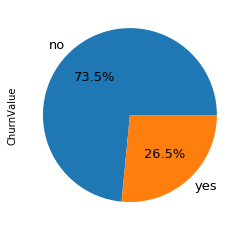

In [19]:
data['ChurnValue'].value_counts().plot.pie(autopct='%.1f%%',labels=['no','yes'],fontsize=13)
plt.show()

# Churn by categorical features

In [20]:
categorical_cols=['Gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod']

In [21]:
import plotly.express as px
for i in categorical_cols:
    fig = px.histogram(data, x='ChurnLabel', color=i)

    # Update yaxis properties
    fig.update_yaxes(title_text='Number of customers', row=1, col=1)
    # Update xaxis properties
    fig.update_xaxes(title_text='Churn', row=1, col=1)

    # Update size and title
    fig.update_layout(autosize=True, width=750, height=600,
        title_font=dict(size=25, family='Courier'),
        title='Churn by '+i,
    )

    fig.show()

Some interesting observations:

    -A higher percentage of senior citizens churned over people who were not senior citizens
    -More people with partners churned over people who did not have partners. 
    -Same for people with dependents
    -The highest churn by internet service is accounted for by Fiber Optic connection users over people who use the DSL and people not using the internet service. 


# Churn by numerical features

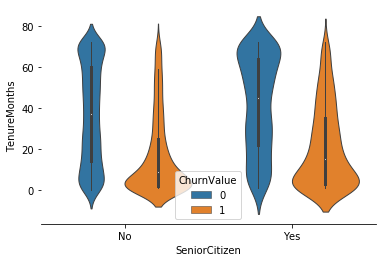

In [22]:
sns.violinplot(data=data, x='SeniorCitizen', y='TenureMonths', hue='ChurnValue',linewidth=1)
sns.despine(left=True)

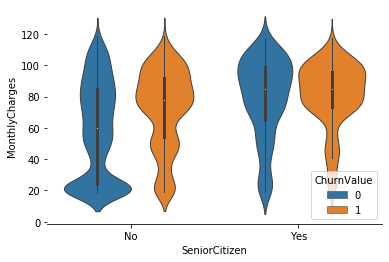

In [23]:
sns.violinplot(data=data, x='SeniorCitizen', y='MonthlyCharges', hue='ChurnValue',linewidth=1)
sns.despine(left=True)

Some Interesting observations:

    -Most retained customers have monthly charges concentrated around 20 Dollars while most churned customers had monthly charges between 80 - 100 Dollars.
    -Most of that customers that churned, churned within approximately the first 5-7 months of joining the service while a lot of the retained customers have been around for upwards of 60-65 months ( 5 years and up).




# Data Preparation
    .Removal of non-significant variables
    .Removal of outliers
    .Replace missing values 
    .Encoding of variables
    
    

In [24]:
dt=data.drop(['CustomerID','Count','Country','State','City','ZipCode','LatLong','Latitude','Longitude','ChurnLabel','CLTV','ChurnReason'],axis=1)

In [25]:
dt.shape

(7043, 21)

In [26]:
dt.head()

,Gender,SeniorCitizen,Partner,Dependents,TenureMonths,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,ChurnValue,ChurnScore
0,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,86
1,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,67
2,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,1,86
3,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,...,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1,84
4,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,...,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,1,89


In [27]:
dt.isnull().sum()

Gender              0
SeniorCitizen       0
Partner             0
Dependents          0
TenureMonths        0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
ChurnValue          0
ChurnScore          0
dtype: int64

In [28]:
dt.nunique()

Gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
TenureMonths          73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
ChurnValue             2
ChurnScore            85
dtype: int64

# Encoding of variables


In [29]:
dt.dtypes

Gender               object
SeniorCitizen        object
Partner              object
Dependents           object
TenureMonths          int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
ChurnValue            int64
ChurnScore            int64
dtype: object

total charges should be converted to numeric 

In [30]:
dt['TotalCharges']=pd.to_numeric(dt['TotalCharges'],errors='coerce')

In [31]:
dt.isnull().sum()

Gender               0
SeniorCitizen        0
Partner              0
Dependents           0
TenureMonths         0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
ChurnValue           0
ChurnScore           0
dtype: int64

11 missing values should be eliminated

In [32]:
dt=dt.dropna(axis=0)

In [33]:
dt.isnull().sum()

Gender              0
SeniorCitizen       0
Partner             0
Dependents          0
TenureMonths        0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
ChurnValue          0
ChurnScore          0
dtype: int64

In [34]:
# Categorical boolean mask
categorical_feature_mask = dt.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_cols = dt.columns[categorical_feature_mask].tolist()
categorical_cols

['Gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [35]:
#LabelEncoder
#import labelencoder
from sklearn.preprocessing import LabelEncoder
# instantiate labelencoder object
le = LabelEncoder()
# apply le on categorical feature columns
dt[categorical_cols] = dt[categorical_cols].apply(lambda col: le.fit_transform(col))
dt.head(10)

,Gender,SeniorCitizen,Partner,Dependents,TenureMonths,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,ChurnValue,ChurnScore
0,1,0,0,0,2,1,0,0,2,2,...,0,0,0,0,1,3,53.85,108.15,1,86
1,0,0,0,1,2,1,0,1,0,0,...,0,0,0,0,1,2,70.70,151.65,1,67
2,0,0,0,1,8,1,2,1,0,0,...,0,2,2,0,1,2,99.65,820.50,1,86
3,0,0,1,1,28,1,2,1,0,0,...,2,2,2,0,1,2,104.80,3046.05,1,84
4,1,0,0,1,49,1,2,1,0,2,...,0,2,2,0,1,0,103.70,5036.30,1,89
5,0,0,1,0,10,1,0,0,0,0,...,2,0,0,0,0,1,55.20,528.35,1,78
6,1,1,0,0,1,0,1,0,0,0,...,0,0,2,0,1,2,39.65,39.65,1,100
7,1,0,0,0,1,1,0,2,1,1,...,1,1,1,0,0,3,20.15,20.15,1,92
8,1,0,1,1,47,1,2,1,0,2,...,0,2,2,0,1,2,99.35,4749.15,1,77
9,1,0,1,0,1,0,1,0,0,2,...,0,0,0,0,0,2,30.20,30.20,1,97


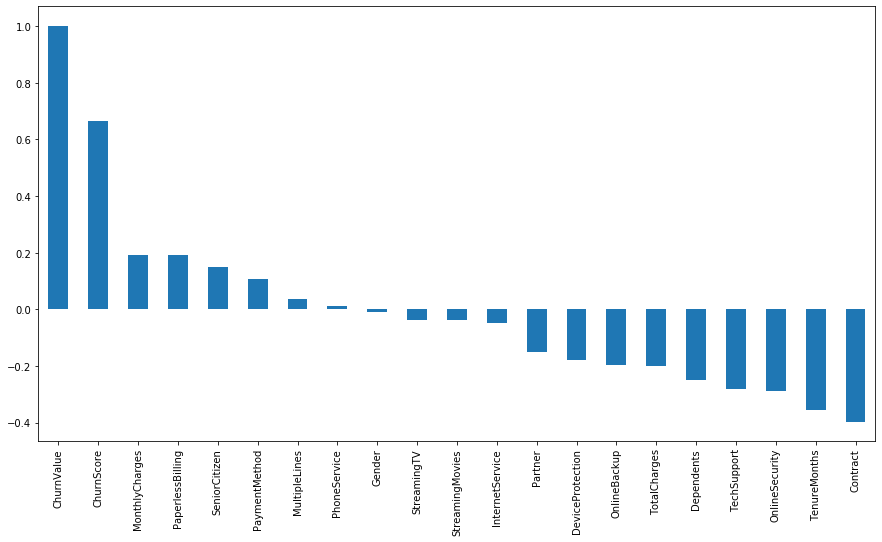

In [36]:
#Get Correlation of "Churn" with other variables:
plt.figure(figsize=(15,8))
dt.corr()['ChurnValue'].sort_values(ascending = False).plot(kind='bar')



Month to month contracts, absence of online security and tech support seem to be positively correlated with churn. While, tenure, two year contracts seem to be negatively correlated with churn.

Interestingly, services such as Online security, streaming TV, online backup, tech support, etc. without internet connection seem to be negatively related to churn.


# K-means

In [37]:
from sklearn.cluster import KMeans

In [38]:
dt1=dt.drop(['ChurnValue'],axis=1)

In [39]:
#Détermination du nombre de cluster grace à la methode du coude
inertie=[]
for i in range(1,10):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(dt1)
    inertie.append(kmeans.inertia_)

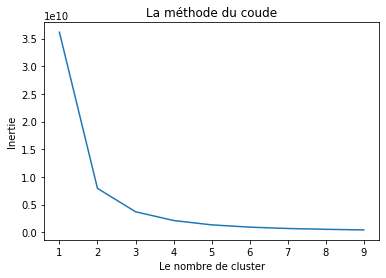

In [40]:
plt.plot(range(1,10),inertie)
plt.title("La méthode du coude")
plt.xlabel("Le nombre de cluster")
plt.ylabel("Inertie")
plt.show()

In [41]:
#D'aprés la methode du coude le nombre idéale de cluster est egale à 2
#Application de KMeans
model = KMeans(n_clusters=2)
model.fit(dt1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [42]:
#le vecteur contenant les differentes valeurs prises par les clusters
y=model.predict(dt1)

In [43]:
#Ajout des clusters à la dataset
dt1.insert(19,"cluster", y)

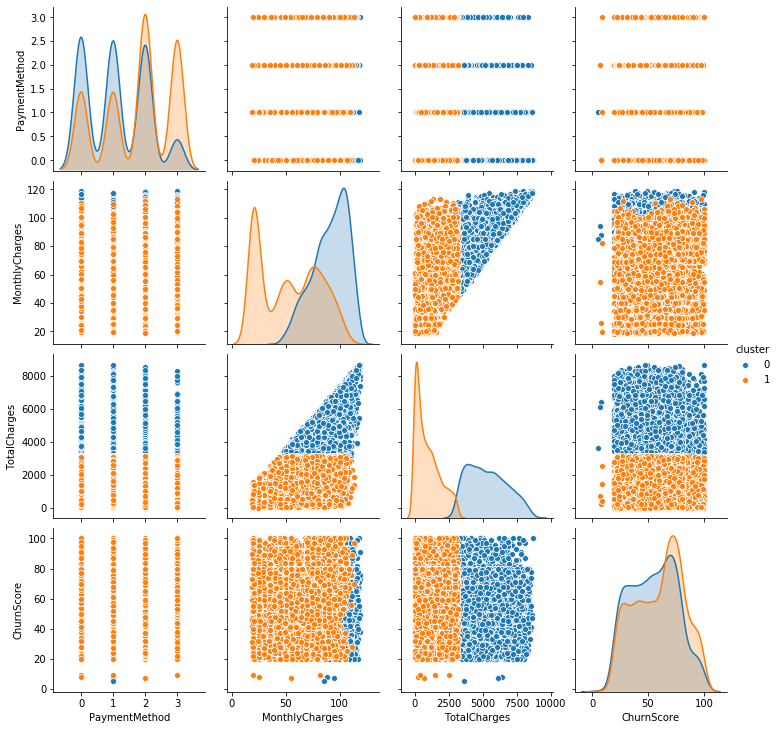

In [44]:
#visualisation des clusters
import seaborn as sns 
sns.pairplot(dt1.iloc[:,-5:],hue="cluster")
plt.show()

In [45]:
#k-means 
import numpy as np
from sklearn import cluster 
kmeans = cluster.KMeans(n_clusters=2);
kmeans.fit(dt1);
#index triés des groupes 
idk = np.argsort(kmeans.labels_);
#affichage des observations et leurs groupes 
print(pd.DataFrame(dt1.index[idk],kmeans.labels_[idk]));
kmeans.labels_
#distances aux centres de classes des observations 
print(kmeans.transform(dt1));
#correspondance avec les groupes réels 
pd.crosstab(dt.iloc[:,19],kmeans.labels_)

       0
0      0
0   6136
0   6137
0   6138
0   3552
..   ...
1   3930
1   3934
1   3937
1   4028
1   7042

[7032 rows x 1 columns]
[[ 873.70453247 5256.58929735]
 [ 830.03388697 5212.92317938]
 [ 169.74516921 4544.10472577]
 ...
 [6382.05052905 1998.83360168]
 [ 635.34826305 5018.36746364]
 [5863.69060749 1480.48552209]]


col_0,0,1
ChurnValue,,
0,3394,1769
1,1548,321


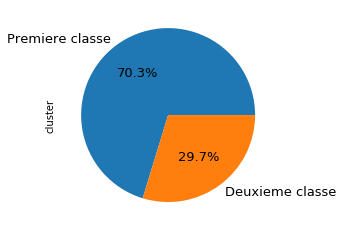

In [46]:
dt1['cluster'].value_counts().plot.pie(autopct='%.1f%%',labels=['Premiere classe','Deuxieme classe','Troisieme Classe'],fontsize=13)
plt.show()

# Classification Hiérarchique Ascendante (CAH)

In [47]:
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster

In [48]:
#générer la matrice des distances 
Z = linkage(dt1,method='ward',metric='euclidean')

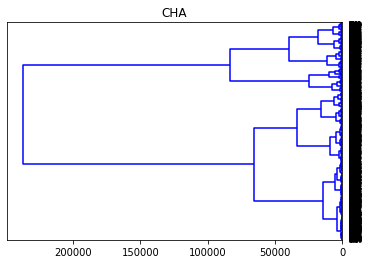

In [49]:
#affichage du dendrogramme 
plt.title("CHA") 
dendrogram(Z,labels=dt1.index,orientation='left',color_threshold=0) 
plt.show()

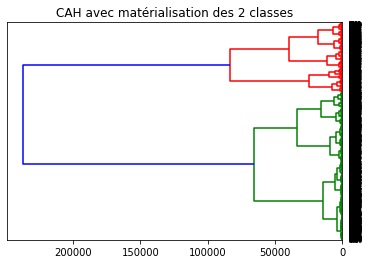

[1 1 1 ... 2 1 2]
       0
1      0
1   6094
1   6095
1   6096
1   3472
..   ...
2   3876
2   3878
2   3885
2   3851
2   7042

[7032 rows x 1 columns]


In [50]:
# matérialisation des deux classes (hauteur t = 150000) 
plt.title('CAH avec matérialisation des 2 classes') 
dendrogram(Z,labels=dt1.index,orientation='left',color_threshold=150000) 
plt.show()

#découpage à la hauteur t = 150000==> identifiants de 2 groupes obtenus 
groupes_cah = fcluster(Z,t=150000,criterion='distance') 
print(groupes_cah)

#index triés des groupes 
import numpy as np 
idg = np.argsort(groupes_cah)

#affichage des observations et leurs groupes
print(pd.DataFrame(dt1.index[idg],groupes_cah[idg]))

In [51]:
#correspondance les vrais labels avec les groupes de la CAH 
pd.crosstab(dt.iloc[:,19],groupes_cah)

col_0,1,2
ChurnValue,,
0,3282,1881
1,1512,357


# Utilisation de la segmentation pour connaitre les raisons de churn

In [52]:
cah_data=dt[['MonthlyCharges','TenureMonths']][dt.ChurnValue==1]
#cah_data.drop(['ChurnValue'],axis=1)


In [53]:
#générer la matrice des distances 
W = linkage(cah_data,method='ward',metric='euclidean')

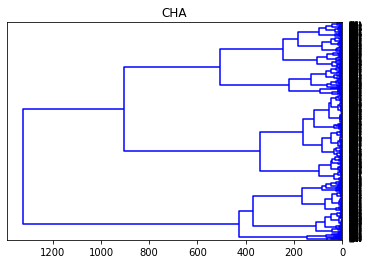

In [54]:
#affichage du dendrogramme 
plt.title("CHA") 
dendrogram(W,labels=cah_data.index,orientation='left',color_threshold=0) 
plt.show()

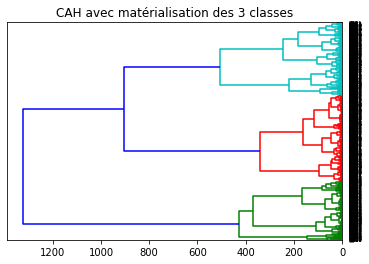

[1 2 2 ... 2 3 2]
       0
1      0
1    504
1    506
1   1313
1   1312
..   ...
3   1048
3    733
3    735
3   1130
3   1376

[1869 rows x 1 columns]


In [55]:
# matérialisation des deux classes (hauteur t = 700) 
plt.title('CAH avec matérialisation des 3 classes') 
dendrogram(W,labels=cah_data.index,orientation='left',color_threshold=700) 
plt.show()

#découpage à la hauteur t = 700==> identifiants de 3 groupes obtenus 
groupes_cah = fcluster(W,t=700,criterion='distance') 
print(groupes_cah)

#index triés des groupes 
import numpy as np 
idg = np.argsort(groupes_cah)

#affichage des observations et leurs groupes
print(pd.DataFrame(cah_data.index[idg],groupes_cah[idg]))

In [56]:
#correspondance des vrais labels avec les groupes de la CAH 
pd.crosstab(dt[dt.ChurnValue==1].iloc[:,19],groupes_cah)

col_0,1,2,3
ChurnValue,,,
1,507,741,621


In [57]:
cah_data["groupes_cah"]=groupes_cah

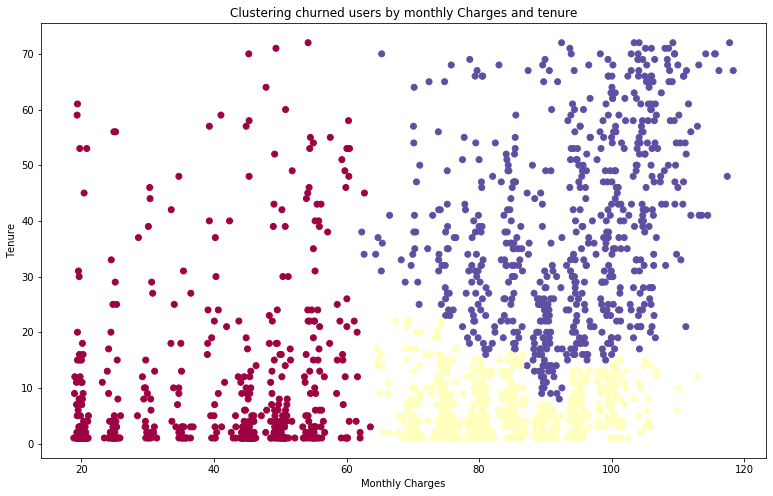

In [58]:
fig, ax = plt.subplots(figsize=(13,8))
plt.scatter( cah_data['MonthlyCharges'], cah_data['TenureMonths'],
           c = cah_data['groupes_cah'], cmap = 'Spectral')

plt.title('Clustering churned users by monthly Charges and tenure')
plt.xlabel('Monthly Charges')
plt.ylabel('Tenure')


plt.show()


--Customers with low monthly charges and low tenure: Could have found a service provider offering even lower charges for   basic services and churned quickly despite low monthly charges.
    
-Customers with high monthly charges and low tenure: The heaviest concentration of churned users. The most common churned users who were possibly unhappy with the prices and stayed for a little while before quickly leaving the service provider for better , cheaper options.
   
-Customers with high monthly charges and high tenure: The most interesting group of churned users. They might have stayed initially despite high prices becuase they either thought the service was worth the price or simply due to lack of better alternatives and churned after a while in contrast with most other churned users who churned pretty quickly in their tenure.
    
-The interesting observation here is that most churned users with low monthly charges churned pretty quickly. There is a very small concentration of churned users who had low prices in the high tenure zone. This usually points to very dissatisfied customers or customers who were looking for temporary service providers at the time.

# Decision Tree


In [59]:
from imblearn.over_sampling import RandomOverSampler
X= dt.drop(['ChurnValue'],axis=1)
y= dt['ChurnValue']
from imblearn.under_sampling import ClusterCentroids
clusters = ClusterCentroids(sampling_strategy='majority',random_state = 1)#RandomOverSampler => pour le oversampling
clusters.fit(X,y)
X_Sampled,Y_Sampled = clusters.fit_resample(X,y)


AttributeError: 'ClusterCentroids' object has no attribute '_validate_data'

In [ ]:
#Diviser les données (70% Apprentissage et 30% Test)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_Sampled,Y_Sampled,test_size=0.3,random_state=0)

In [ ]:
param_grid = {'criterion': ['gini', 'entropy'],
             'max_depth': np.arange(1,10)}

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [ ]:
grid = GridSearchCV(DecisionTreeClassifier(random_state=1), param_grid=param_grid, cv=5)

In [ ]:
grid.fit(X_train, y_train)

In [ ]:
grid.best_params_

In [ ]:
final_model = DecisionTreeClassifier(random_state=1, criterion='gini', max_depth=6)

In [ ]:
final_model.fit(X_train, y_train)

In [ ]:
print( 'le train_score=',final_model.score(X_train, y_train))
print( 'le test_score=',final_model.score(X_test, y_test))

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(final_model, X_test, y_test, display_labels=['NO','Yes'], cmap=plt.cm.Blues)
plt.show()

In [ ]:
from sklearn.metrics import classification_report
y_pred1 = final_model.predict(X_test)

print(classification_report(y_test, y_pred1, digits=8, target_names= ['NO','Yes'] ))


In [ ]:
dt.columns

In [ ]:
names=['Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'TenureMonths',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'ChurnScore']

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(40,20))
plot_tree(final_model, feature_names= names, class_names=['NO','Yes'], filled=True)
plt.show()
plt.savefig('tree.png')

In [ ]:
final_model.feature_importances_

In [ ]:
from sklearn.tree import export_text
print(export_text(final_model, feature_names=names))

# Random Forest

In [60]:
from sklearn.ensemble import RandomForestClassifier

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=3)

NameError: name 'train_test_split' is not defined

In [62]:
model=RandomForestClassifier(n_estimators=50)
model.fit(X_train, y_train)

NameError: name 'X_train' is not defined

In [ ]:
model.score(X_test,y_test)

In [ ]:
from sklearn.metrics import classification_report
y_pred2 = model.predict(X_test)

print(classification_report(y_test, y_pred2, digits=8, target_names= ['NO','Yes'] ))

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred2)
cm

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Truth')

# C4.5

In [76]:
from chefboost import Chefboost as chef

In [77]:
config = {'algorithm': 'C4.5'}

In [78]:
dt2=dt.drop(['ChurnValue'],axis=1)
churnvalue=dt.iloc[:,[19]]
dt2.insert(20,'Decision',churnvalue)
dt2['Decision']=dt2['Decision'].astype(str)

In [79]:
dt2.dtypes

Gender                int32
SeniorCitizen         int32
Partner               int32
Dependents            int32
TenureMonths          int64
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges        float64
ChurnScore            int64
Decision             object
dtype: object

In [80]:
model = chef.fit(dt2,config)

C4.5  tree is going to be built...
-------------------------
finished in  185.66160488128662  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  94.55346985210467 % on  7032  instances
Labels:  ['1' '0']
Confusion matrix:  [[1681, 195], [188, 4968]]
Precision:  89.6055 %, Recall:  89.9411 %, F1:  89.773 %


# CHAID

In [81]:
#importation de chefboost
from chefboost import Chefboost as cb


In [82]:
#préparation de la dataframe pour qu'elle soit adéquate aux exigences des methodes de la bibliotheque chefboost
churnvalue=dt.iloc[:,[19]]
dt3=dt1.copy()
dt3.insert(21,"ChurnValue",churnvalue)
#On a renommé la coolonne churn value par ce que l'algotirhme CHAID exige que la colonne contenant les etiquettes doit etre nommé 'Decision'
#On n'aura pas besoin de diviser les données en donnés de test et donnés d'entrainement on doit juste préciser qu'elle est la colonne qui porte les etiquettes et la methode fit() s'occupera du reste
dt3=dt3.rename(columns={'ChurnValue': 'Decision'})
#Conversion du type de la colonne Decision de int à object car si le type de la colonne de decisione n'est pas object l'algorithme CHAID ne fonctionnera et deviendre un algorithme de regression
dt3['Decision'] = dt3['Decision'].astype(str)
dt3.dtypes

Gender                int32
SeniorCitizen         int32
Partner               int32
Dependents            int32
TenureMonths          int64
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges        float64
cluster               int32
ChurnScore            int64
Decision             object
dtype: object

In [83]:
dt3.head()

,Gender,SeniorCitizen,Partner,Dependents,TenureMonths,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,cluster,ChurnScore,Decision
0,1,0,0,0,2,1,0,0,2,2,...,0,0,0,1,3,53.85,108.15,0,86,1
1,0,0,0,1,2,1,0,1,0,0,...,0,0,0,1,2,70.70,151.65,0,67,1
2,0,0,0,1,8,1,2,1,0,0,...,2,2,0,1,2,99.65,820.50,0,86,1
3,0,0,1,1,28,1,2,1,0,0,...,2,2,0,1,2,104.80,3046.05,0,84,1
4,1,0,0,1,49,1,2,1,0,2,...,2,2,0,1,0,103.70,5036.30,1,89,1


In [84]:
#Configuration de l'algorithme chaid 
config_chaid = {'algorithm': 'CHAID'}

In [85]:
#Construction de l'arbre de décision
tree_chaid=cb.fit(dt3.copy(),config_chaid)

CHAID  tree is going to be built...
-------------------------
finished in  202.33669567108154  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  94.21217292377702 % on  7032  instances
Labels:  ['1' '0']
Confusion matrix:  [[1647, 185], [222, 4978]]
Precision:  89.9017 %, Recall:  88.122 %, F1:  89.003 %


# ID3

In [86]:
#Configuration de l'algorithme ID3
config_id3 = {'algorithm' : 'ID3'}

In [87]:
#Construction de l'arbre de décision
tree_id3=cb.fit(dt3.copy(), config_id3)

ID3  tree is going to be built...
-------------------------
finished in  195.20922136306763  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  94.8947667804323 % on  7032  instances
Labels:  ['1' '0']
Confusion matrix:  [[1665, 155], [204, 5008]]
Precision:  91.4835 %, Recall:  89.0851 %, F1:  90.2684 %


# Courbe de ROC 

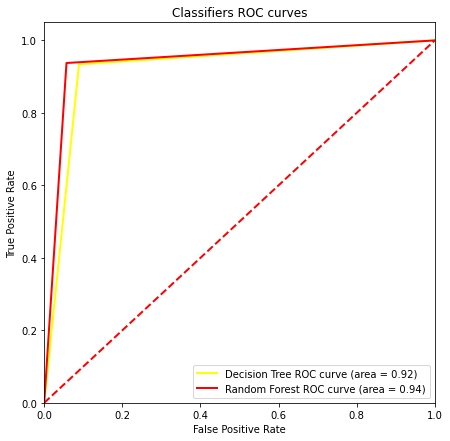

In [116]:
from sklearn.metrics import roc_curve, auc
fpr1, tpr1, threshold1 = roc_curve(y_test, y_pred1) 
roc_auc1 = auc(fpr1, tpr1)
fpr2, tpr2, threshold2 = roc_curve(y_test, y_pred2) 
roc_auc2 = auc(fpr2, tpr2)

plt.figure(figsize=(7,7)) 
plt.plot(fpr1, tpr1, color='yellow', lw=2, label='Decision Tree ROC curve (area = %0.2f)'% roc_auc1)
plt.plot(fpr2, tpr2, color='red', lw=2, label='Random Forest ROC curve (area = %0.2f)'% roc_auc2)

plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--') 
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.05]) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('Classifiers ROC curves') 
plt.legend(loc = "lower right")
plt.show()